In [413]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from os import listdir

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

import my_func
import importlib
importlib.reload(my_func)

&lt;module &#39;my_func&#39; from &#39;c:\\Users\\Evgen\\skillfactory\\Projects\\Project_4\\my_func.py&#39;&gt;

In [414]:
input_folder = 'input/'
listdir(input_folder)

[&#39;train.csv&#39;]

| Столбец        |     Значение                    |
|:---------------|:--------------------------------|
|client_id	     |    идентификатор клиента        |  
|education	     |   уровень образования           | 
|sex	         | пол заёмщика  
|age             |	возраст заёмщика  
|car	         |флаг наличия автомобиля  
|car_type	     |флаг автомобиля-иномарки  
|decline_app_cnt |	количество отказанных прошлых заявок  
|good_work       |	флаг наличия «хорошей» работы  
|bki_request_cnt |	количество запросов в БКИ  
|home_address	 |категоризатор домашнего адреса  
|work_address	 |категоризатор рабочего адреса  
|income	         |доход заёмщика  
|foreign_passport|	наличие загранпаспорта  
|default	     |наличие дефолта  

In [415]:
data = pd.read_csv(input_folder + 'train.csv')
data.drop(['client_id'],  axis=1, inplace=True)
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   education         73492 non-null  object
 1   sex               73799 non-null  object
 2   age               73799 non-null  int64 
 3   car               73799 non-null  object
 4   car_type          73799 non-null  object
 5   decline_app_cnt   73799 non-null  int64 
 6   good_work         73799 non-null  int64 
 7   bki_request_cnt   73799 non-null  int64 
 8   home_address      73799 non-null  int64 
 9   work_address      73799 non-null  int64 
 10  income            73799 non-null  int64 
 11  foreign_passport  73799 non-null  object
 12  default           73799 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 7.3+ MB


In [416]:
data.education.value_counts(dropna=False)

SCH    38860
GRD    23365
UGR     9816
PGR     1257
NaN      307
ACD      194
Name: education, dtype: int64

In [417]:
edu_income_rel = data.groupby(by='education')['income'].agg(lambda x:x.mean()).sort_values()
print(edu_income_rel)
edu_income_rel = dict({'SCH': list([0, 31960.275039]),
                       'UGR': list([31960.275039,39391.796251]),
                       'GRD': list([39391.796251, 54663.948941]),
                       'PGR': list([54663.948941, 77548.206046]),
                       'ACD': list([77548.206046, 999999999999])})

def fill_edu(income, edu_income_rel):
    for edu, income_edu in edu_income_rel.items():
         if income_edu[0] < income <  income_edu[1]:
             return edu

na_index = data[data.education.isna()].index
for index in na_index:
    inc = data.income.iloc[index]
    data.education.iloc[index] = fill_edu(inc, edu_income_rel)

education
SCH    31960.275039
UGR    39391.796251
GRD    54663.948941
PGR    77548.206046
ACD    82966.634021
Name: income, dtype: float64


&lt;AxesSubplot:&gt;

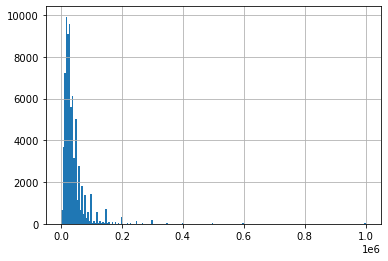

In [418]:
data.income.hist(bins=200)

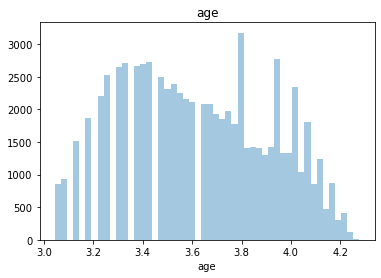

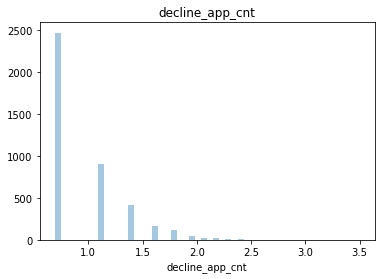

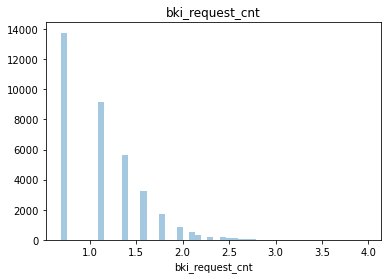

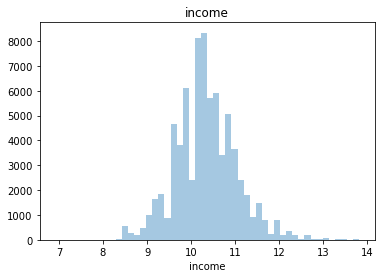

In [419]:
train = data
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income'] #data.select_dtypes(include=np.number).columns.tolist()
data1 = data.copy()
log_data = data1[num_cols].apply(np.log)
train = log_data
for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

&lt;AxesSubplot:&gt;

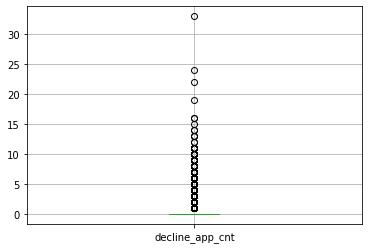

In [423]:
data.boxplot('decline_app_cnt')
# data.boxplot('income')

&lt;AxesSubplot:&gt;

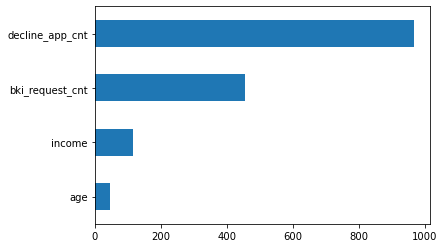

In [425]:
train = data
imp_num = Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [ ]:
data